In [1]:
from pylab import *

In [2]:
#parameters
theta13 = 0.5*arcsin(sqrt(0.093))
theta12 = 0.5*arcsin(sqrt(0.846))
theta23 = 0.5*arcsin(sqrt(0.92))

#phases (set to zero)
d = 0.0
a1 = 0.0
a2 = 0.0

In [3]:
m21sq = 0.000079
m32sq = 0.0027

me = 2.0 #electron neutrino, eV/c^2
mu = sqrt(me**2 + m21sq) #muon neutrino, eV/c^2
mt = sqrt(mu**2 + m32sq) #tau neutrino, eV/c^2

In [4]:
#PMNS mixing matrix
# |flavor> = Uc|mass>
# |mass> = U|flavor>
U = matrix(zeros((3,3)),dtype='complex')
U[0,0] = cos(theta12)*cos(theta13)
U[0,1] = sin(theta12)*cos(theta13)
U[0,2] = sin(theta13)*exp(-1j*d)

U[1,0] = -sin(theta12)*cos(theta23)-cos(theta12)*sin(theta23)*sin(theta13)*exp(1j*d)
U[1,1] = cos(theta12)*cos(theta23)-sin(theta12)*sin(theta23)*sin(theta13)*exp(1j*d)
U[1,2] = sin(theta23)*cos(theta13)

U[2,0] = sin(theta12)*sin(theta23) - cos(theta12)*cos(theta23)*sin(theta13)*exp(1j*d)
U[2,1] = -cos(theta12)*sin(theta23)-sin(theta12)*cos(theta23)*sin(theta13)*exp(1j*d)
U[2,2] = cos(theta23)*cos(theta13)

Ud = matrix(zeros((3,3)),dtype='complex')
Ud[0,0] = exp(1j*a1/2)
Ud[1,1] = exp(1j*a2/2)
Ud[2,2] = 1.0

U = U*Ud
Uc = conj(U.transpose())

psie = U[0,:]
psie.shape = (3,1)

psim = U[1,:]
psim.shape = (3,1)

psit = U[2,:]
psit.shape = (3,1)

In [5]:
#Hamiltonian
H = matrix(zeros((3,3)))
E = 0.10
H[0,0] = E + (me**2.0)/(2.0*E)
H[1,1] = E + (mu**2.0)/(2.0*E)
H[2,2] = E + (mt**2.0)/(2.0*E)



In [9]:
Nt = 4000
tmax = 40000
t = linspace(0,tmax,Nt)

p1 = zeros(Nt)
p2 = zeros(Nt)
p3 = zeros(Nt)

psi0 = array([0.0,0.0,1.0])
psi0.shape = (3,1)

for n in range(0,Nt):
    eiHt = matrix(zeros((3,3)),dtype = 'complex')
    eiHt[0,0] = exp(-1j*H[0,0]*t[n])
    eiHt[1,1] = exp(-1j*H[1,1]*t[n])
    eiHt[2,2] = exp(-1j*H[2,2]*t[n])
    
    psit = Uc*eiHt*U*psi0
    
    p1[n] = abs(psit[0])**2
    p2[n] = abs(psit[1])**2
    p3[n] = abs(psit[2])**2

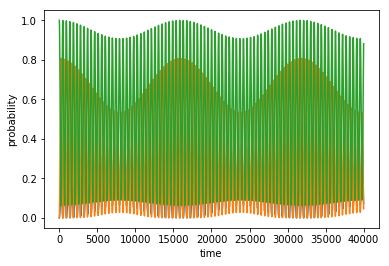

In [10]:
plot(t,p1)
plot(t,p2)
plot(t,p3)
xlabel('time')
ylabel('probability')
show()


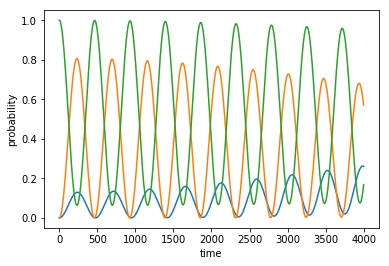

In [8]:
plot(t,p1)
plot(t,p2)
plot(t,p3)
xlabel('time')
ylabel('probability')
show()